In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import random

In [2]:
class Interpolator:
    def __init__(self, f, dim, a, b, p):
        self.dim = dim
        self.a = a
        self.h = [(bi - ai) / p for ai, bi in zip(a, b)]
        self.p = p
        self.g = dict()
        self.__build_g(f, ())

    def __build_g(self, f, i):
        if len(i) == self.dim:
            v = [self.a[j] + i[j] * self.h[j] for j in range(self.dim)]
            self.g[i] = f(v)
            return

        for j in range(self.p):
            self.__build_g(f, i + (j, ))

    def __lij(self, x, i, j):
        prod = 1
        for k in range(self.p):
            if k != i:
                prod *= (((x[j] - self.a[j]) / self.h[j]) - k) / (i - k)
        return prod

    def __eval(self, x, i = ()):
        k = len(i)
        if k == self.dim:
            return self.g[i]
        
        s = 0
        for j in range(self.p):
            new_i = i + (j,)
            s += self.__eval(x, new_i) * self.__lij(x, new_i[k], k)
        
        return s

    def __call__(self, x):
        return self.__eval(x)

In [3]:
from IPython.display import HTML, display
import tabulate

def display_table(table, headers, caption):
    display(HTML(tabulate.tabulate(table, headers=headers, tablefmt='html',) \
        .replace('<table>\n', f'<table>\n<caption>{caption}</caption>\n')))

p,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
max error,2.90116,4.27932,2.04289,0.956198,0.296927,0.0692852,0.0158809,0.00317623,0.000544981,7.1771e-05,1.01776e-05,8.64815e-07,1.77345e-07,9.02144e-09,7.62442e-10


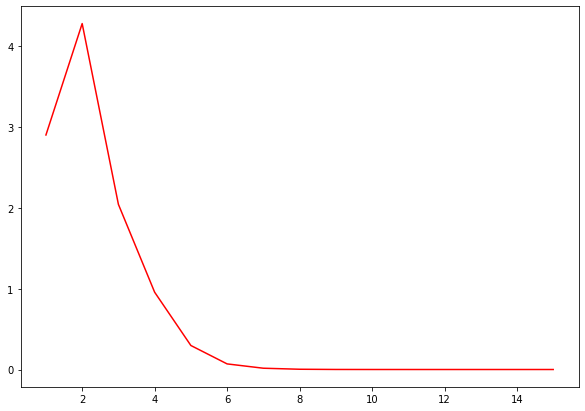

In [4]:
dim = 3

def f(v):
	x = v[0]
	y = v[1]
	z = v[2]
	return np.sin(4.0 * x) + np.cos(4.0 * y) + np.sin(4.0 * z)

a = [0] * dim
b = [1] * dim

max_p = 15
ps = list(range(1, max_p+1))

headers = ['p'] + ps
table = ['max error']

n_samples = 100
random.seed(1000)

for p in ps:
    interpolator = Interpolator(f, dim, a, b, p)
    max_err = 0
    for _ in range(n_samples):
        x = [random.random() for _ in range(dim)]

        ref = f(x)
        actual = interpolator(x)

        err = abs(ref - actual)

        if err > max_err:
            max_err = err

    table.append(max_err)

display_table([table], headers, 'Зависимость ошибки интерполяции от числа точек сетки')

fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(ps, table[1:], 'r')


Ошибка "скачет", наверное, потому что даже меньшее число точек сетки может быть расположено более удачно (попадая или не попадая в волну) т.к. функция периодическая с довольно большой частотой. И, в таком случае, при небольшом числе точек сетки, а значит и при небольшой степени многочлена, функцию нельзя приблизить с хорошей точностью.